# Project 1

## Step 1: Load the data and perform basic operations.

##### 1. Load the data in using pandas.

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns             
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('darkgrid')     

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
act = pd.read_csv("../data/act.csv",index_col=0)

In [3]:
sat = pd.read_csv ("../data/sat.csv",index_col=0)

##### 2. Print the first ten rows of each dataframe.

In [4]:
act.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [5]:
sat.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


##### 3. Describe in words what each variable (column) is.

# ACT Exam Table:
* State: names of states around U.S.
* Participation: participation percentage in ACT exam.
* English: each row indicates to the average score in English for all participants within one state (value range 1-36).
* Reading: each row indicates to the average score in Reading for all participants within one state (value range 1-36).
* Math: each row indicates to the average score in Math for all participants within one state (value range 1-36).
* Science: each row indicates to the average score in Science for all participants within one state (value range 0-25).
* Composite: each row indicates to the composite score in (English\Reading\Science) for all participants within one state


# SAT Exam Table:
* State: names of states around U.S.
* Participation: participation percentage in SAT exam.
* Evidence-Based Reading and Writing: each row indicates to the average score in (Evidence-Based Reading and Writing) for all participants within one state (value range 200-800).
* Math: each row indicates to the average score in (Math) for all participants within one state (value range 200-800).
* Total: each row indicates to the sum of EBRW average score and Math average score within one state (value range 400-1600).

##### 4. Does the data look complete? Are there any obvious issues with the observations?

* (Participation) column datatype is an (object) in both tables, it should be a (float) because it indicates the participation percentage and that is a numeric value.
* The data in both tables are complete (no missing values).
* ACT table has one extra entry.
* from the statistical information I noticed that SAT has a minimum value=52 in Math, despite the value range of Math should be between (200-800).
* After filtering SAT table I found the state that has Math value = 52 and that was obviously a typing error, so I decided to correct it by substracting the Reading score from the total.



In [6]:
sat.isnull().sum()

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

In [7]:
sat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.4+ KB


In [8]:
act.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null float64
dtypes: float64(5), object(2)
memory usage: 3.2+ KB


In [9]:
sat.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


In [10]:
act.describe()

,English,Math,Reading,Science,Composite
count,52.000000,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385,21.509615
std,2.332132,1.963602,2.048672,3.151113,2.002083
min,16.300000,18.000000,18.100000,2.300000,17.800000
25%,19.000000,19.400000,20.475000,19.900000,19.800000
50%,20.550000,20.900000,21.700000,21.150000,21.400000
75%,23.300000,23.100000,24.125000,22.525000,23.600000
max,25.500000,25.300000,26.000000,24.900000,25.500000


In [11]:
sat[sat["Math"]< 200]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060


In [12]:
sat.at[20,"Math"]=524   # change the Math value in row 20 from 52 to 524

##### 5. Print the types of each column.

In [13]:
act.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [14]:
sat.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

##### 6. Do any types need to be reassigned? If so, go ahead and do it.

In [15]:
# change (participation) data type from (object) to (float) in both dataframes

sat.Participation = sat.Participation.map(lambda el: float(el.replace('%',''))/100.0)

sat.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [16]:
act.Participation = act.Participation.map(lambda el: float(el.replace('%',''))/100.0)

act.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [17]:
sat.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,0.05,593,572,1165
1,Alaska,0.38,547,533,1080
2,Arizona,0.30,563,553,1116
3,Arkansas,0.03,614,594,1208
4,California,0.53,531,524,1055


In [18]:
act.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,0.60,20.3,20.7,21.4,21.0,21.0
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4


##### 7. Create a dictionary for each column mapping the State to its respective value for that column. (For example, you should have three SAT dictionaries.)

In [41]:
sat_ebrw=dict(zip(sat['State'],sat['Evidence-Based Reading and Writing']))
sat_math=dict(zip(sat['State'],sat['Math']))
sat_total= dict(zip(sat['State'],sat['Total']))

act_english =dict(zip(act['State'],act['English']))
act_math =dict(zip(act['State'],act['Math']))
act_reading =dict(zip(act['State'],act['Reading']))
act_science=dict(zip(act['State'],act['Science']))
act_composite=dict(zip(act['State'],act['Composite']))

#example of the result:

# ## {"Math": {'Alabama': 543,
#               'Maryland':434
#              }
#     "Science":{'Alabama': 543,
#                'Maryland':434
#               }
#     }

##### 9. Merge the dataframes on the state column.

In [20]:
final_tests=pd.merge(sat, act, on='State', how='inner')   
final_tests.head()

,State,Participation_x,Evidence-Based Reading and Writing,Math_x,Total,Participation_y,English,Math_y,Reading,Science,Composite
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,19.4
4,California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8


In [21]:
final_tests.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 11 columns):
State                                 51 non-null object
Participation_x                       51 non-null float64
Evidence-Based Reading and Writing    51 non-null int64
Math_x                                51 non-null int64
Total                                 51 non-null int64
Participation_y                       51 non-null float64
English                               51 non-null float64
Math_y                                51 non-null float64
Reading                               51 non-null float64
Science                               51 non-null float64
Composite                             51 non-null float64
dtypes: float64(7), int64(3), object(1)
memory usage: 4.8+ KB


##### 10. Change the names of the columns so you can distinguish between the SAT columns and the ACT columns.

In [22]:
final_tests.rename(columns={
        'State':'State',
        'Participation_x':'sat_Participation',
        'Evidence-Based Reading and Writing':'sat_EBRW',
        'Math_x':'sat_Math',
        'Total':'sat_Total',
        'Participation_y':'act_Participation',
        'English':'act_English',
        'Math_y':'act_Math',
        'Reading':'act_Reading',
        'Science':'act_Science',
        'Composite':'act_Composite'
    }, inplace=True)

final_tests.head()

,State,sat_Participation,sat_EBRW,sat_Math,sat_Total,act_Participation,act_English,act_Math,act_Reading,act_Science,act_Composite
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,19.4
4,California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8


##### 8. Create one dictionary where each key is the column name, and each value is an iterable (a list or a Pandas Series) of all the values in that column.

In [23]:
act_sat_dict = {k:list(final_tests[k]) for k in final_tests.columns}
#print(act_sat_dict)
#another solution >>>> act_sat_dict=sat.to_dict(orient='list')

##### 11. Print the minimum and maximum of each numeric column in the data frame.

In [43]:
final_tests.max( axis=0,numeric_only=True)

sat_Participation       1.0
sat_EBRW              644.0
sat_Math              651.0
sat_Total            1295.0
act_Participation       1.0
act_English            25.5
act_Math               25.3
act_Reading            26.0
act_Science            24.9
act_Composite          25.5
dtype: float64

In [25]:
final_tests.min(axis=0, numeric_only=True)

sat_Participation      0.02
sat_EBRW             482.00
sat_Math             468.00
sat_Total            950.00
act_Participation      0.08
act_English           16.30
act_Math              18.00
act_Reading           18.10
act_Science            2.30
act_Composite         17.80
dtype: float64

##### 12. Write a function using only list comprehensions, no loops, to compute standard deviation. Using this function, calculate the standard deviation of each numeric column in both data sets. Add these to a list called `sd`.

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

In [26]:
def stdve(dataframe):
    return list(round(dataframe[col].std(),3) for col in dataframe.select_dtypes(include = ['float', 'int64']).columns)
        
    
sd= stdve(final_tests)

sd

[0.353, 45.667, 47.121, 92.495, 0.321, 2.354, 1.982, 2.067, 3.182, 2.021]

## Step 2: Manipulate the dataframe

##### 13. Turn the list `sd` into a new observation in your dataset.

In [27]:
sd.insert(0,"STD's")

final_tests.loc[len(final_tests)]=sd
final_tests.tail()


,State,sat_Participation,sat_EBRW,sat_Math,sat_Total,act_Participation,act_English,act_Math,act_Reading,act_Science,act_Composite
47,Washington,0.640,541.000,534.000,1075.000,0.290,20.900,21.900,22.100,22.000,21.900
48,West Virginia,0.140,558.000,528.000,1086.000,0.690,20.000,19.400,21.200,20.500,20.400
49,Wisconsin,0.030,642.000,649.000,1291.000,1.000,19.700,20.400,20.600,20.900,20.500
50,Wyoming,0.030,626.000,604.000,1230.000,1.000,19.400,19.800,20.800,20.600,20.200
51,STD's,0.353,45.667,47.121,92.495,0.321,2.354,1.982,2.067,3.182,2.021


##### 14. Sort the dataframe by the values in a numeric column (e.g. observations descending by SAT participation rate)

In [28]:
final_tests.sort_values('sat_Participation', ascending=False)

,State,sat_Participation,sat_EBRW,sat_Math,sat_Total,act_Participation,act_English,act_Math,act_Reading,act_Science,act_Composite
22,Michigan,1.000,509.000,495.000,1005.000,0.290,24.100,23.700,24.500,23.800,24.100
6,Connecticut,1.000,530.000,512.000,1041.000,0.310,25.500,24.600,25.600,24.600,25.200
7,Delaware,1.000,503.000,492.000,996.000,0.180,24.100,23.400,24.800,23.600,24.100
8,District of Columbia,1.000,482.000,468.000,950.000,0.320,24.400,23.500,24.900,23.500,24.200
29,New Hampshire,0.960,532.000,520.000,1052.000,0.180,25.400,25.100,26.000,24.900,25.500
19,Maine,0.950,513.000,499.000,1012.000,0.080,24.200,24.000,24.800,23.700,24.300
12,Idaho,0.930,513.000,493.000,1005.000,0.380,21.900,21.800,23.000,22.100,22.300
9,Florida,0.830,520.000,497.000,1017.000,0.730,19.000,19.400,21.000,19.400,19.800
21,Massachusetts,0.760,555.000,551.000,1107.000,0.290,25.400,25.300,25.900,24.700,25.400
39,Rhode Island,0.710,539.000,524.000,1062.000,0.210,24.000,23.300,24.700,23.400,24.000


##### 15. Use a boolean filter to display only observations with a score above a certain threshold (e.g. only states with a participation rate above 50%)

In [29]:
final_tests[final_tests['sat_Participation'] > 0.50]


,State,sat_Participation,sat_EBRW,sat_Math,sat_Total,act_Participation,act_English,act_Math,act_Reading,act_Science,act_Composite
4,California,0.53,531.0,524.0,1055.0,0.31,22.5,22.7,23.1,22.2,22.8
6,Connecticut,1.00,530.0,512.0,1041.0,0.31,25.5,24.6,25.6,24.6,25.2
7,Delaware,1.00,503.0,492.0,996.0,0.18,24.1,23.4,24.8,23.6,24.1
8,District of Columbia,1.00,482.0,468.0,950.0,0.32,24.4,23.5,24.9,23.5,24.2
9,Florida,0.83,520.0,497.0,1017.0,0.73,19.0,19.4,21.0,19.4,19.8
10,Georgia,0.61,535.0,515.0,1050.0,0.55,21.0,20.9,22.0,21.3,21.4
11,Hawaii,0.55,544.0,541.0,1085.0,0.90,17.8,19.2,19.2,19.3,19.0
12,Idaho,0.93,513.0,493.0,1005.0,0.38,21.9,21.8,23.0,22.1,22.3
14,Indiana,0.63,542.0,532.0,1074.0,0.35,22.0,22.4,23.2,22.3,22.6
19,Maine,0.95,513.0,499.0,1012.0,0.08,24.2,24.0,24.8,23.7,24.3


## Step 3: Visualize the data

##### 16. Using MatPlotLib and PyPlot, plot the distribution of the Rate columns for both SAT and ACT using histograms. (You should have two histograms. You might find [this link](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes) helpful in organizing one plot above the other.) 

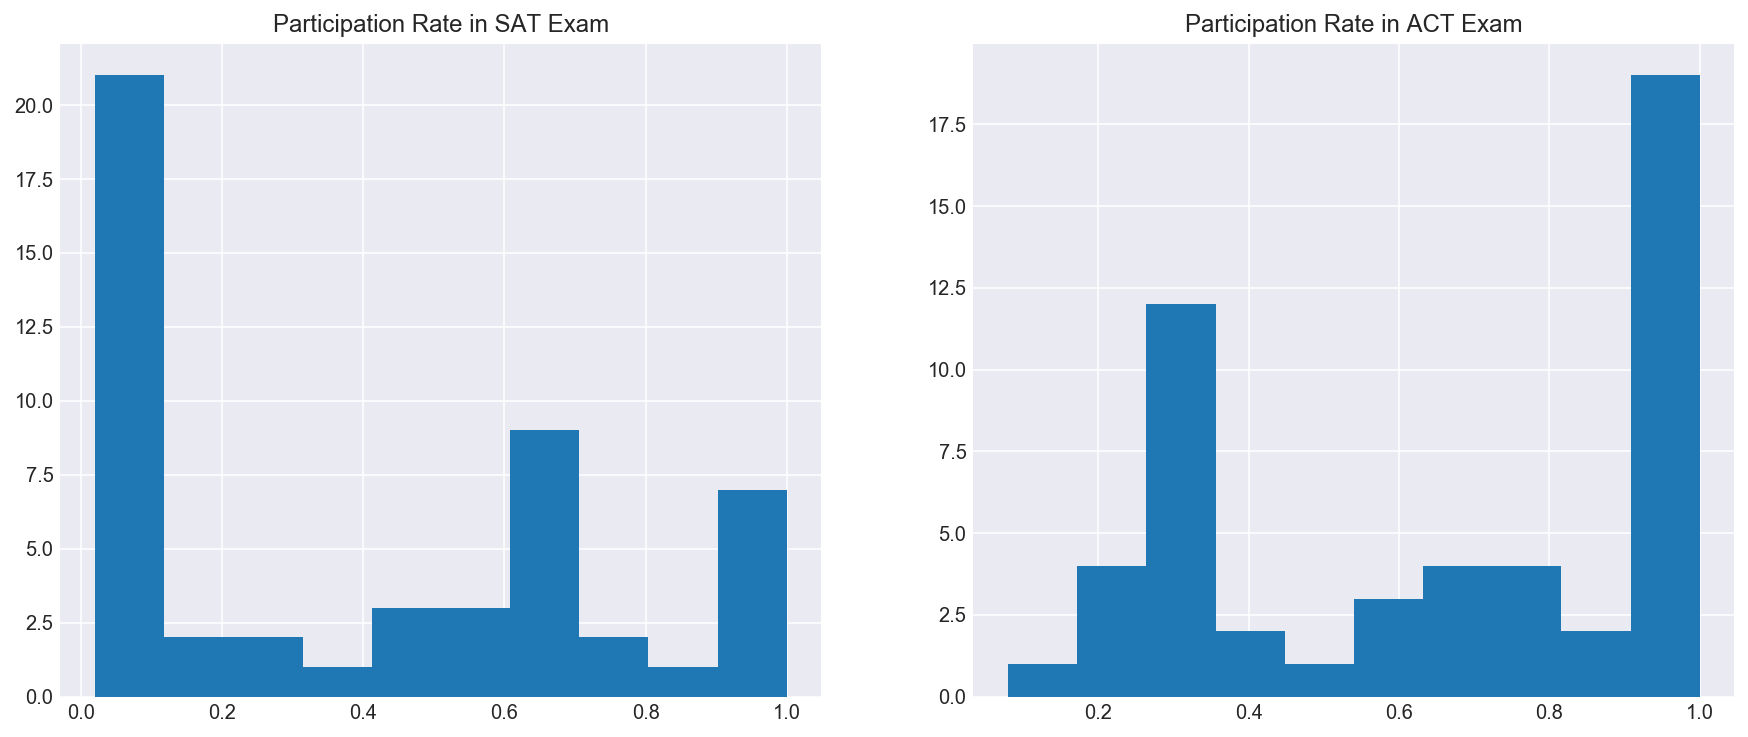

In [30]:
fig , ax = plt.subplots(figsize=(15,6), ncols=2)
sat['Participation'].hist(ax=ax[0])
ax[0].set_title('Participation Rate in SAT Exam')

act['Participation'].hist(ax=ax[1])
ax[1].set_title('Participation Rate in ACT Exam')
plt.show();


##### 17. Plot the Math(s) distributions from both data sets.

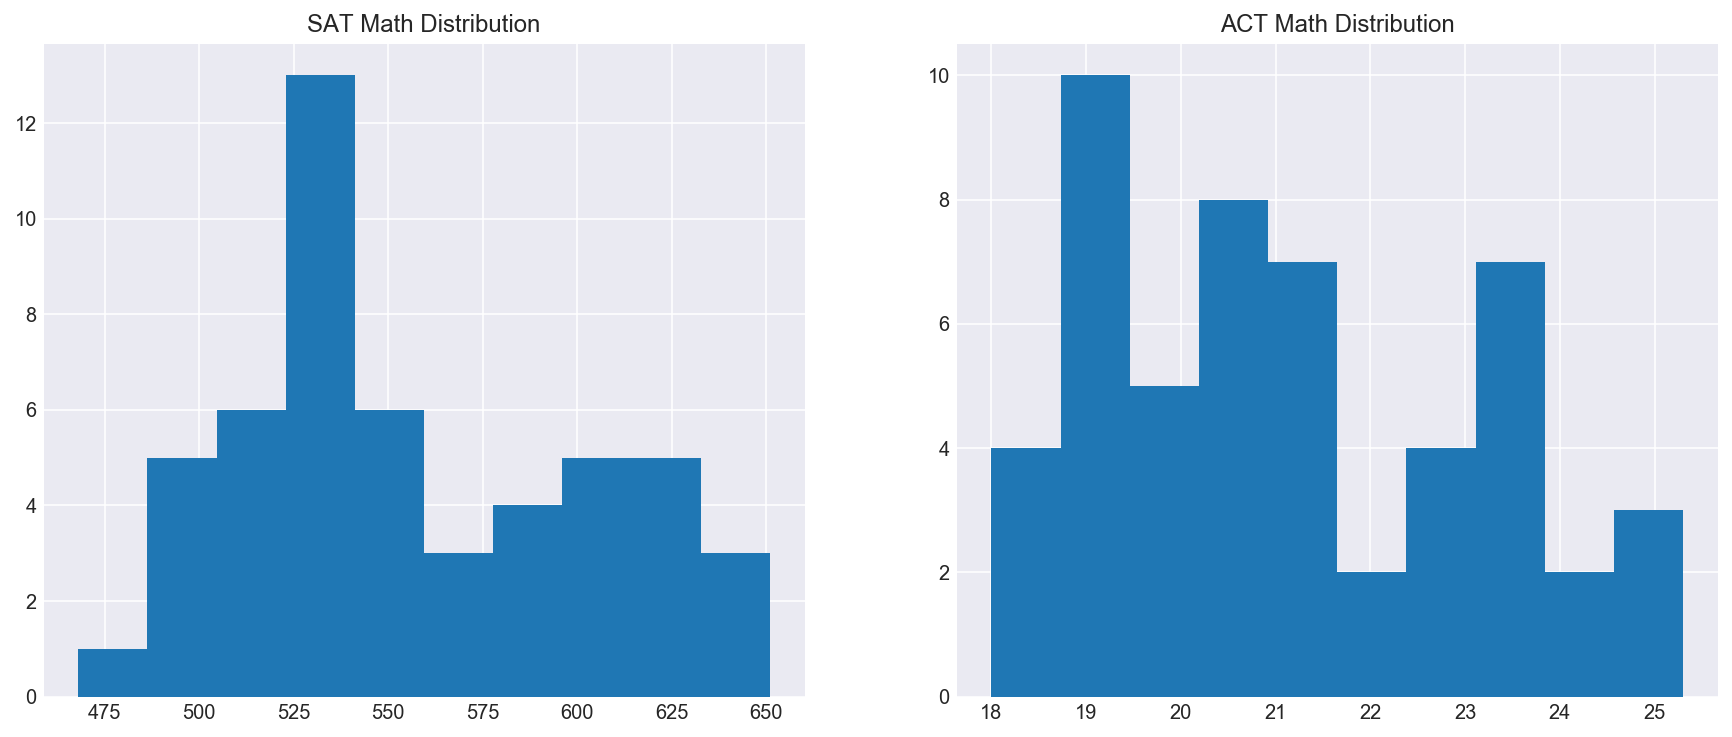

In [31]:
fig , ax = plt.subplots(figsize=(15,6), ncols=2)
sat['Math'].hist(ax=ax[0])
ax[0].set_title('SAT Math Distribution')

act['Math'].hist(ax=ax[1])
ax[1].set_title('ACT Math Distribution')

plt.show();

##### 18. Plot the Verbal distributions from both data sets.

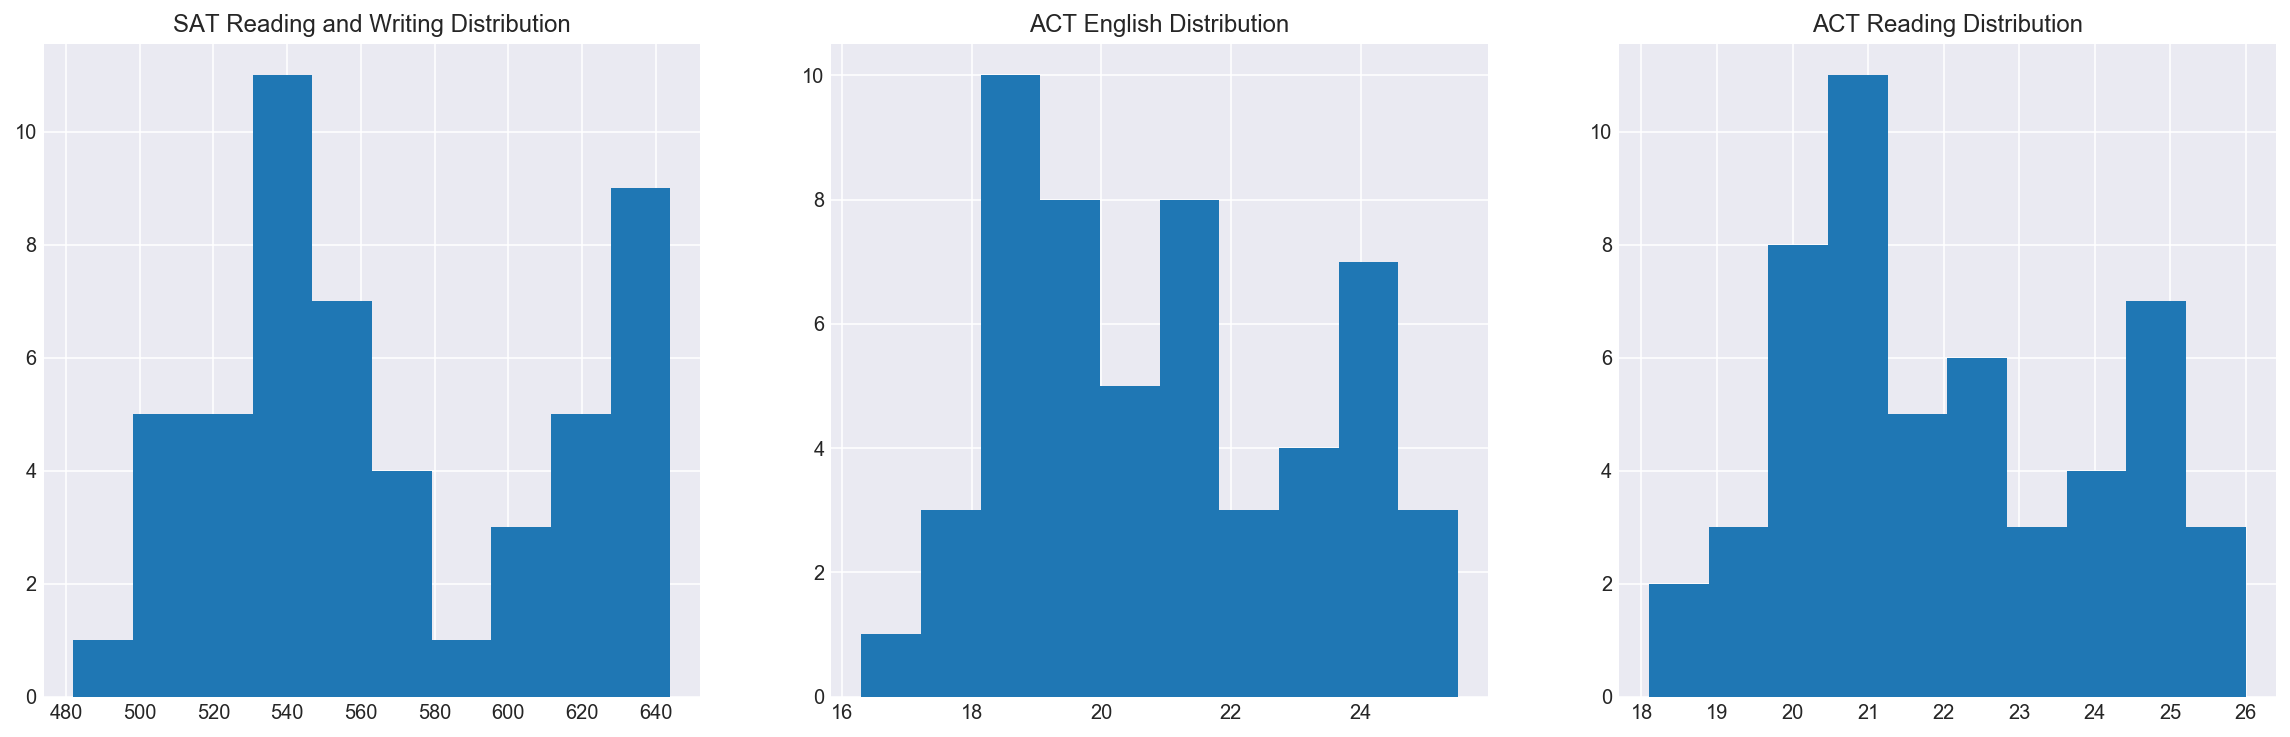

In [32]:
fig , ax = plt.subplots(figsize=(20,6), ncols=3)
sat['Evidence-Based Reading and Writing'].hist(ax=ax[0])
ax[0].set_title('SAT Reading and Writing Distribution')

act['English'].hist(ax=ax[1])
ax[1].set_title('ACT English Distribution')

act['Reading'].hist(ax=ax[2])
ax[2].set_title('ACT Reading Distribution')

plt.show();

##### 19. When we make assumptions about how data are distributed, what is the most common assumption?

The most common assumption of how data is usually distributed is that it matches a normal distribution where
mean = mode = median.

##### 20. Does this assumption hold true for any of our columns? Which?

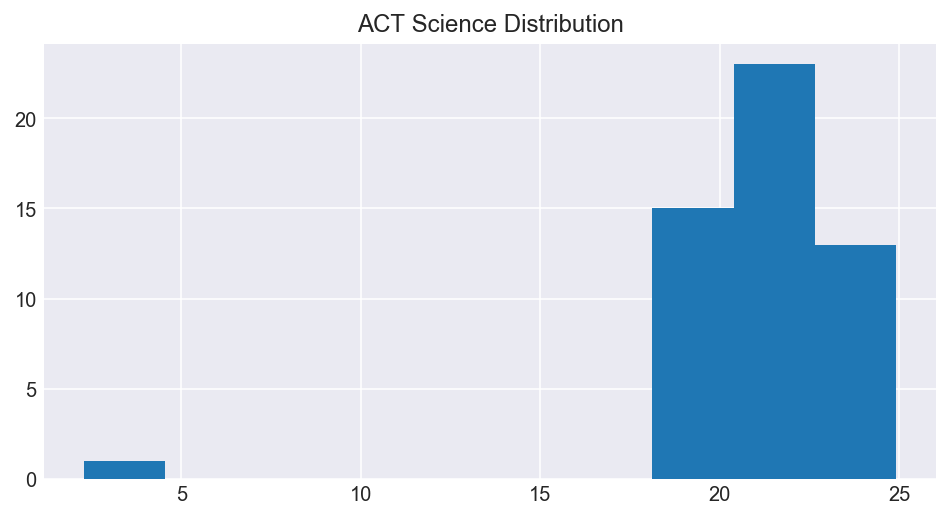

In [33]:
######## find the distribution for Science in ACT Exam ########

fig , ax = plt.subplots(figsize=(8,4))

act['Science'].hist()
ax.set_title('ACT Science Distribution')

plt.show();

No, this assumption is not true for any of our columns. None of them is normally distributed, they are either positively or negatively skewed.

##### 21. Plot some scatterplots examining relationships between all variables.

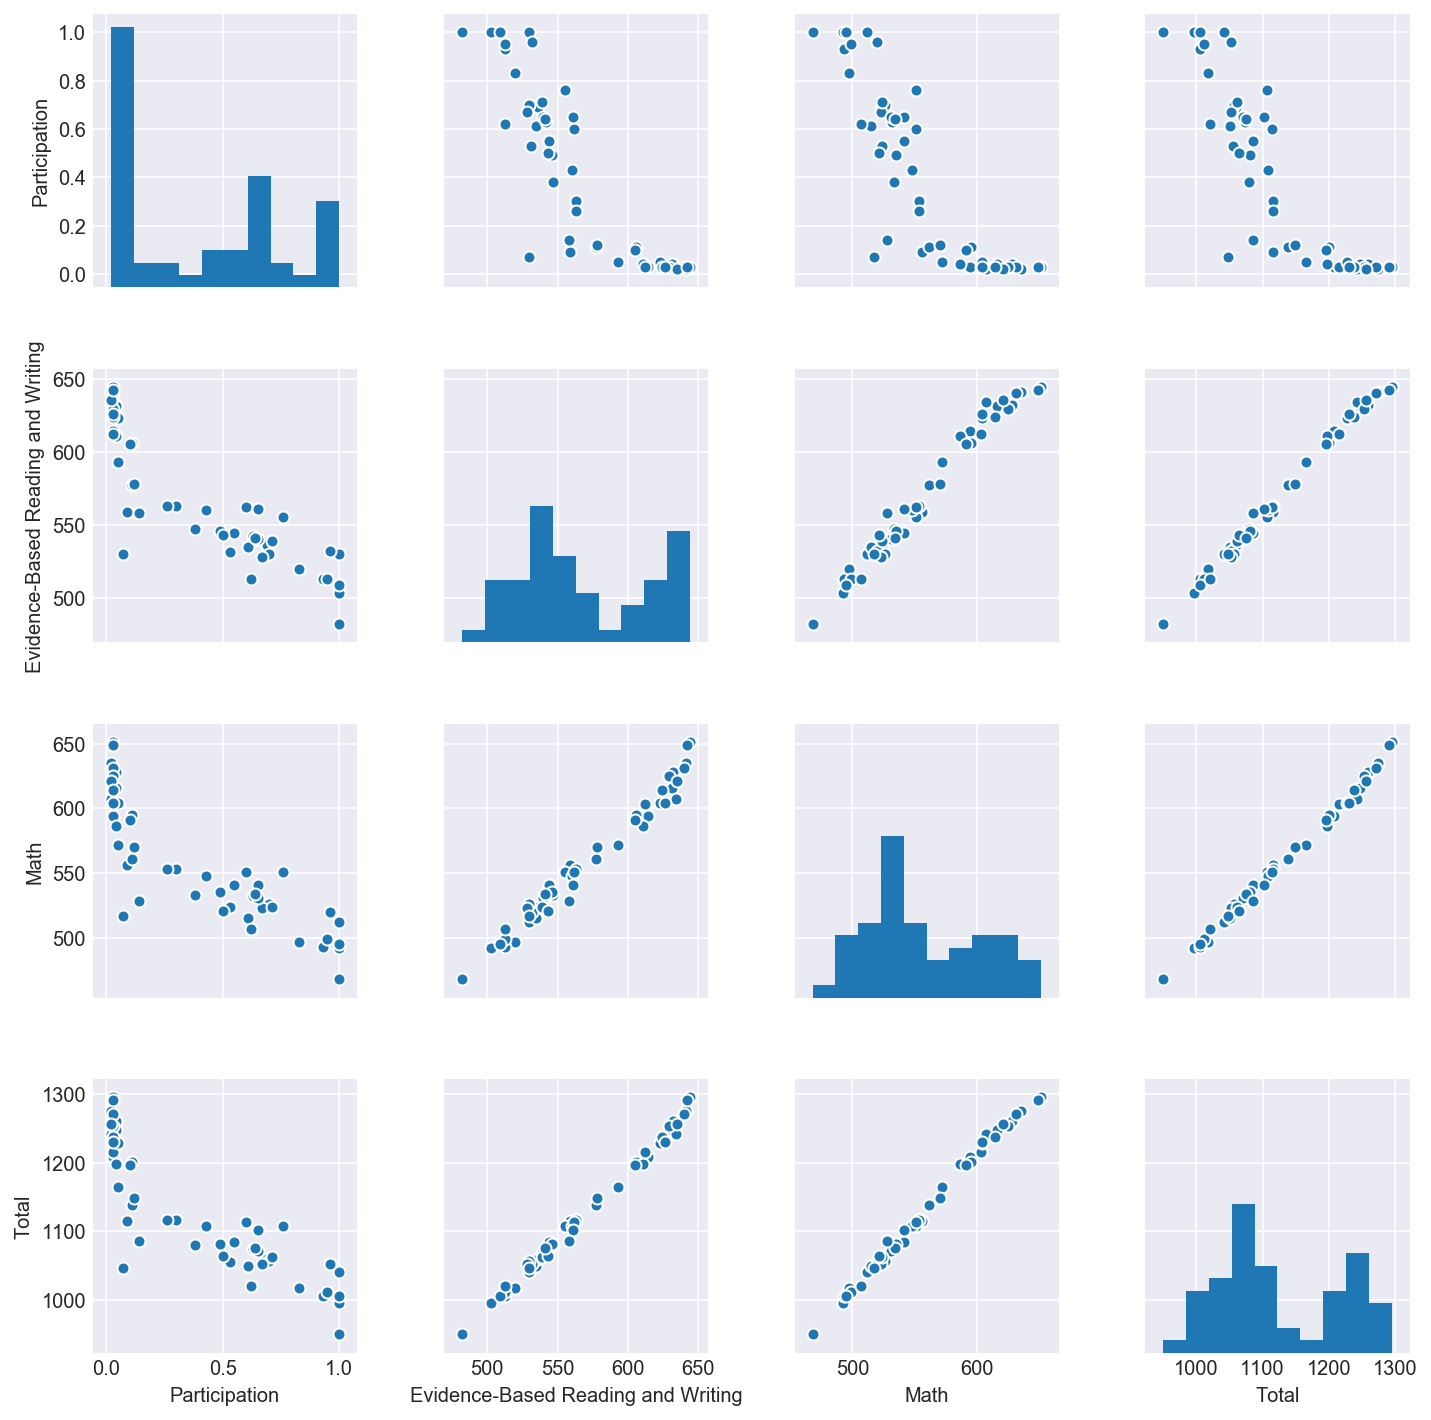

In [34]:
sns.pairplot(sat);

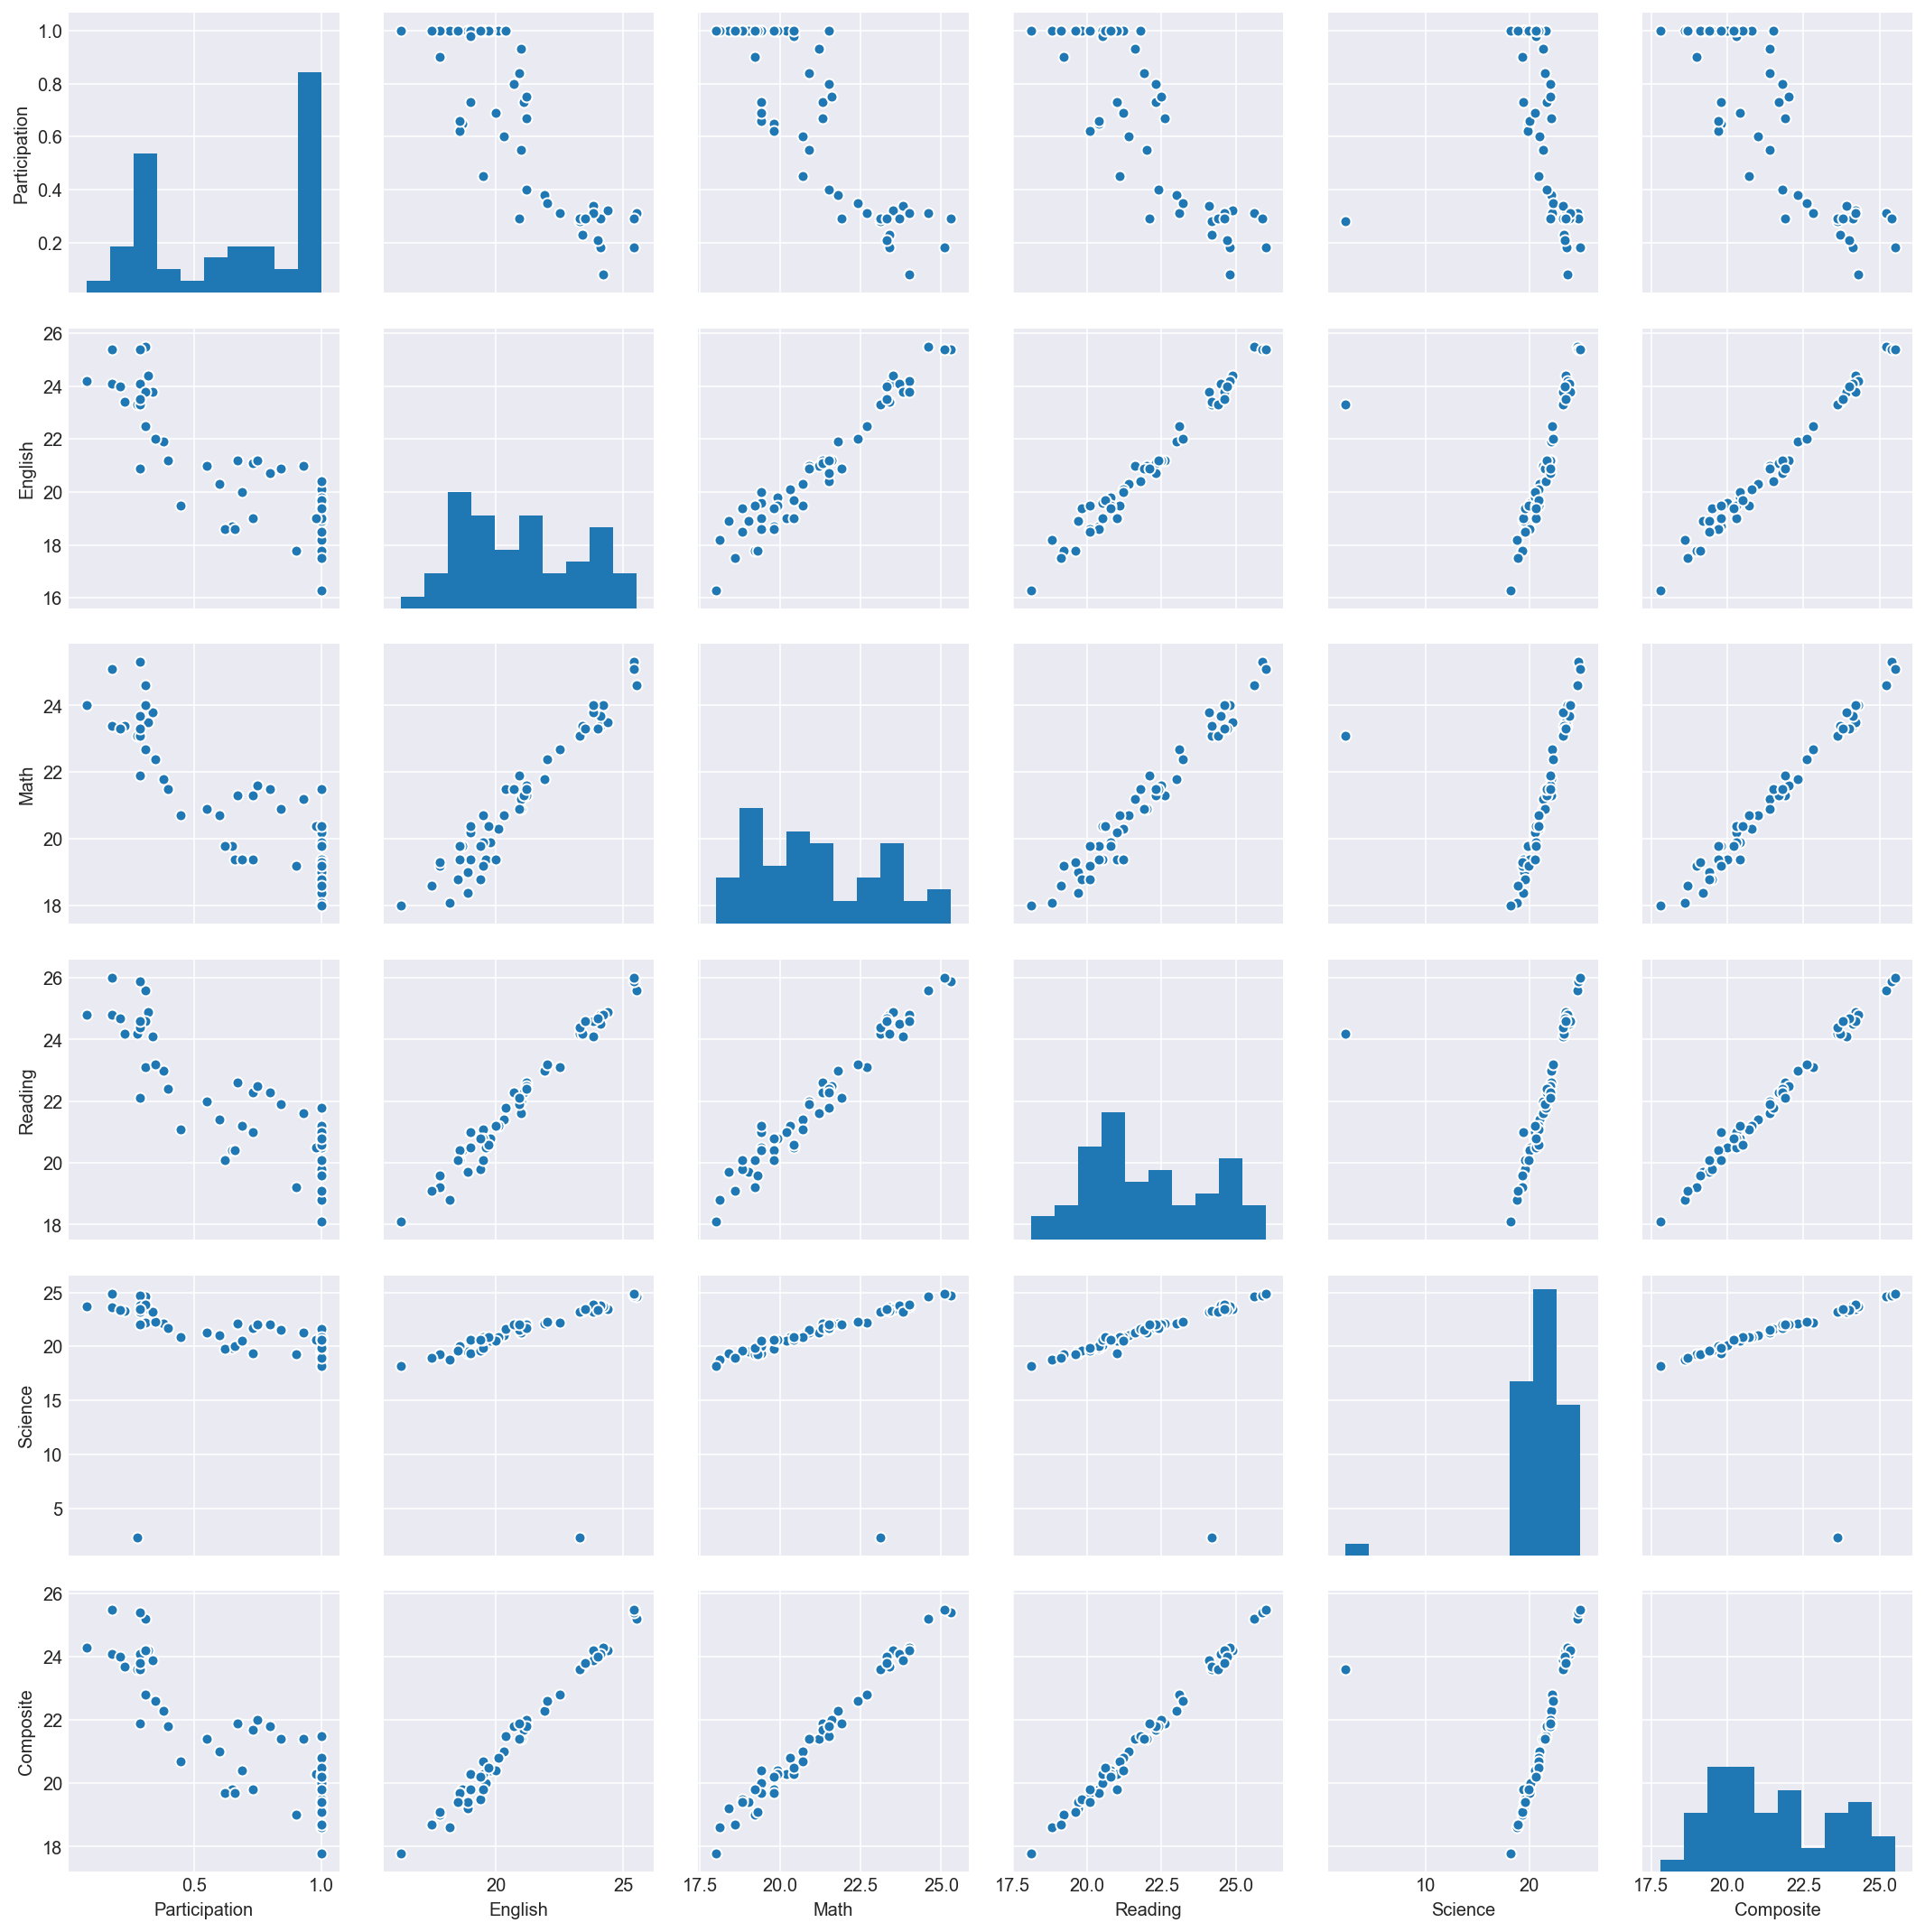

In [35]:
sns.pairplot(act);

##### 22. Are there any interesting relationships to note?

* In SAT Exam there is a positive linear relationship between Reading and Writing which makes some sense since you can generally infer that students who have high Reading and Writing scores could have a high Math score as well.

* In ACT Exam there is a positive linear relationship among all tests.

* In both SAT & ACT Exams there is a negative linear relationship between participation percentage and average score among all tests, that can be explained in this article:

https://blog.prepscholar.com/average-sat-and-act-scores-by-stated-adjusted-for-participation-rate



##### 23. Create box plots for each variable. 

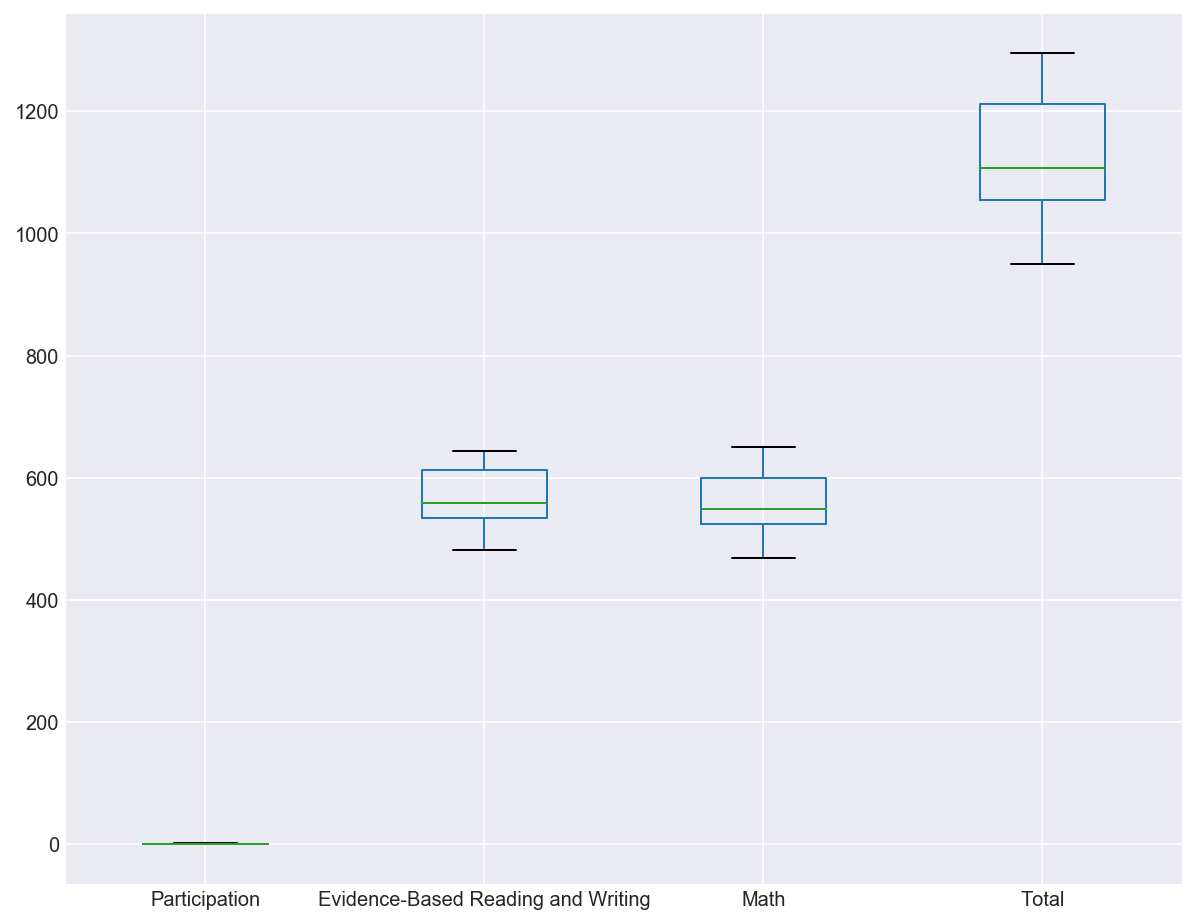

In [36]:
fig, ax = plt.subplots(figsize=(10,8))
sat.boxplot();

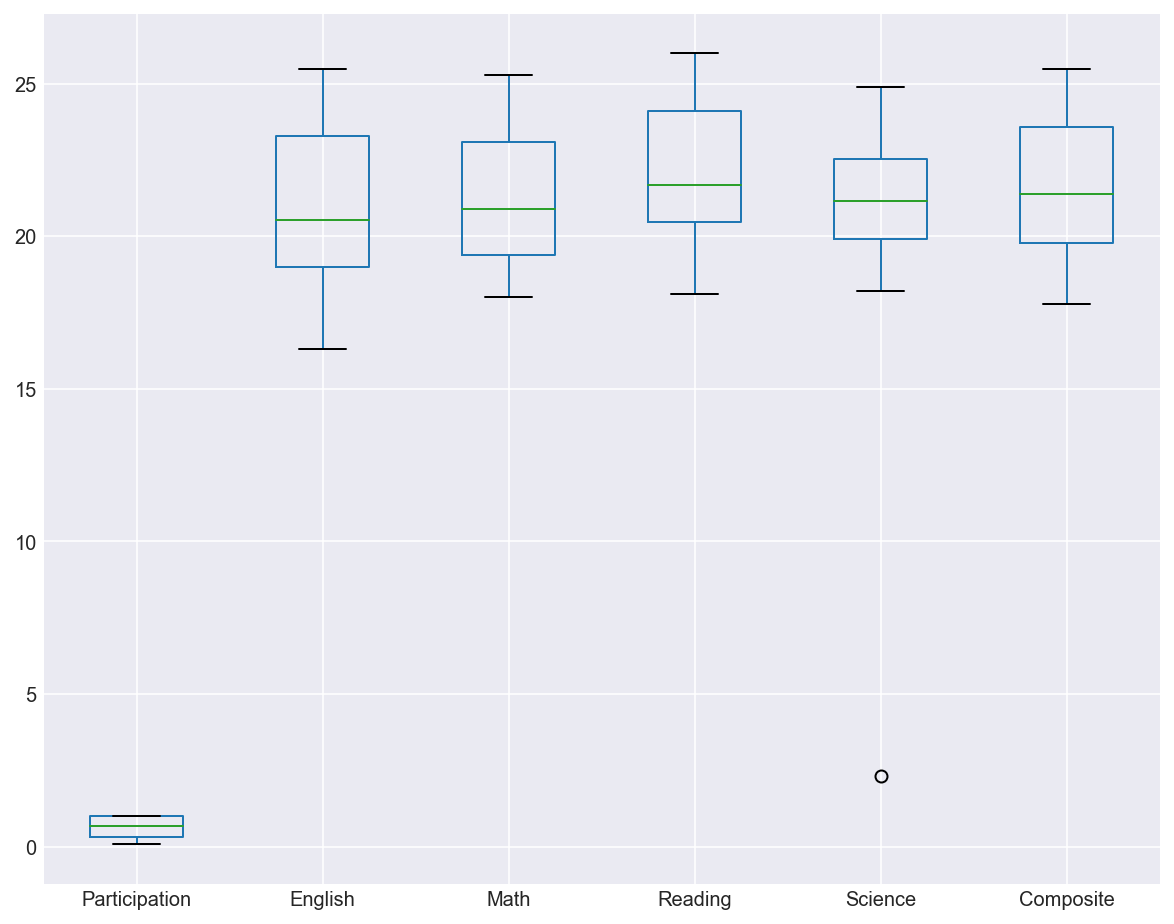

In [37]:
fig, ax = plt.subplots(figsize=(10,8))
act.boxplot();

##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 

##SAT
https://public.tableau.com/profile/bushra4577#!/vizhome/SAT_23/SAT
    
##ACT
https://public.tableau.com/profile/bushra4577#!/vizhome/ACT_13/ACT

## Step 4: Descriptive and Inferential Statistics

##### 24. Summarize each distribution. As data scientists, be sure to back up these summaries with statistics. (Hint: What are the three things we care about when describing distributions?)

### In general:
* The three things we care about when describing distributions are: Measures of cenre (mean-mode-median), Measures of spread(Standard Deviation,variance, 5 number summary), and the Shape of data.

* Statisticaly, Symmetric distributions are when mean = mode = median, Negative Skew is when mean < median < mode, and Positive Skew is mode < median < mean.

### SAT Participation Rate:
* from the histogram we notice that SAT participation rate is positively skewed meaning that participation is low.

### ACT Participation Rate:
* from the histogram we notice that SAT participation rate is negatively skewed meaning that participation in this test is high.

### SAT and ACT Math scores:
* are positively skewed.
* ACT Math: (Mode = 19.4, Median = 20.9, Mean = 21.2) Mode < Median < Mean
* SAT Math: (Mode = 541, Median = 549.5, Mean = 557.54) Mode < Median < Mean

### ACT Science:
* is negatively skewed, it has an outlire thatshowed in both histogram and the boxplot.

### SAT Reading and Writing, ACT English, and ACT Reading:
* are all positively skewed.
* SAT Reading and Writing: (Mode = 530, Median = 559, Mean = 569) Mode < Median < Mean
* ACT English: (Mode = 19.5, Median = 20.7, Mean = 20.9) Mode < Median < Mean
* ACT Reading: (Mode = 20.8, Median = 21.8, Mean = 22.0) Mode < Median < Mean

##### 25. Summarize each relationship. Be sure to back up these summaries with statistics.

This Question is canceled.

##### 26. Execute a hypothesis test comparing the SAT and ACT participation rates. Use $\alpha = 0.05$. Be sure to interpret your results.

In [38]:
# Is there any relationship between SAT participation rate and ACT participation rate?

stats.ttest_ind(sat['Participation'], act['Participation'])

Ttest_indResult(statistic=-3.8303821313480526, pvalue=0.0002223140576950348)

Hypotheses 0: the mean of participation rate for SAT = the mean of participation rate for ACT.

Hypotheses 1: the mean of participation rate for SAT != the mean of participation rate for ACT.

The p_value(0.0002) < Alpha (0.05), that means there is sufficient evidence to reject the null hypothesis, so the mean of participation rate for SAT doesn't equal the mean of participation rate for ACT.

##### 27. Generate and interpret 95% confidence intervals for SAT and ACT participation rates.

In [39]:
##SAT:
sat_CI= stats.t.interval(0.95, len(sat['Participation'])-1, loc=np.mean(sat['Participation']),
                 scale=np.std(sat['Participation'], ddof = 1))
print('{level}% of the time, the true population mean for SAT will be between the two values {CI}. {rem}% of the time, it will not.\n\n'.format(level=95,CI=sat_CI,rem=5))


##ACT:
act_CI=stats.t.interval(0.95, len(act['Participation'])-1, loc=np.mean(act['Participation']),
                  scale=np.std(act['Participation'], ddof = 1))
print('{level}% of the time, the true population mean for ACT will be between the two values {CI}. {rem}% of the time, it will not.'.format(level=95,CI=act_CI,rem=5))


95% of the time, the true population mean for SAT will be between the two values (-0.31051279537380627, 1.1065912267463553). 5% of the time, it will not.


95% of the time, the true population mean for ACT will be between the two values (0.012473997685060967, 1.2906029253918618). 5% of the time, it will not.


##### 28. Given your answer to 26, was your answer to 27 surprising? Why?

Yes it's surprising, there is overlap between two 95% confidence intervals for SAT and ACT participation rates, even though the hypothesis test indicated that the mean of participation rate for SAT doesn't equal the mean of participation rate for ACT.

##### 29. Is it appropriate to generate correlation between SAT and ACT math scores? Why?

In [40]:
print(final_tests.iloc[:51][["sat_Math","act_Math"]].corr())

          sat_Math  act_Math
sat_Math  1.000000 -0.420456
act_Math -0.420456  1.000000


We found that the correlation is near to 1 or -1 which indicates a strong relationship between the two variables. And at this case, we can say that is it acceptable to test the correlation between SAT and ACT math scores because if a student got a good score in SAT math, there is a big chance for the same student to have a good score in ACT math as well.

##### 30. Suppose we only seek to understand the relationship between SAT and ACT data in 2017. Does it make sense to conduct statistical inference given the data we have? Why?

It does not make sense because we cannot provide a generalized results without a more detailed dataset, We would need a more granular level analysis on the local school district or even county level per state.